<a href="https://colab.research.google.com/github/Snowy1013z/creditcard_fraud/blob/main/Fraud_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime  # to access datetime
import scipy.stats as stats

import plotly.express as px # for interactive plotting
import plotly.graph_objects as go # for interactive plotting

# set the graphics style initially to defaul
plt.style.use('default')

import warnings # to ignore warning
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

# Path to the first file
file1_path = '/content/drive/My Drive/fraud test.csv'


In [ ]:
data_o= pd.read_csv(file1_path)

In [ ]:
data = data_o.copy()

In [ ]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# Data Cleaning (add, delete, or transform columns)

Jerry

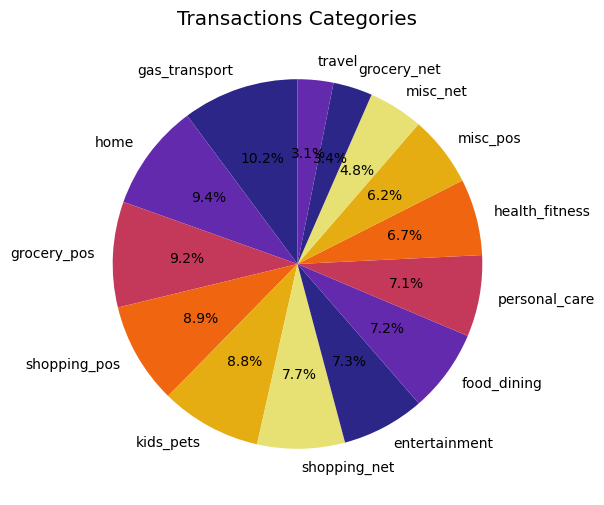

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams["figure.figsize"]=10,6
data = pd.read_csv('fraud test.csv')

value_counts = data['category'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    value_counts,
    labels=value_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("CMRmap", n_colors=6).as_hex()
)

plt.title('Transactions Categories')
plt.show()

<Axes: xlabel='category', ylabel='amt'>

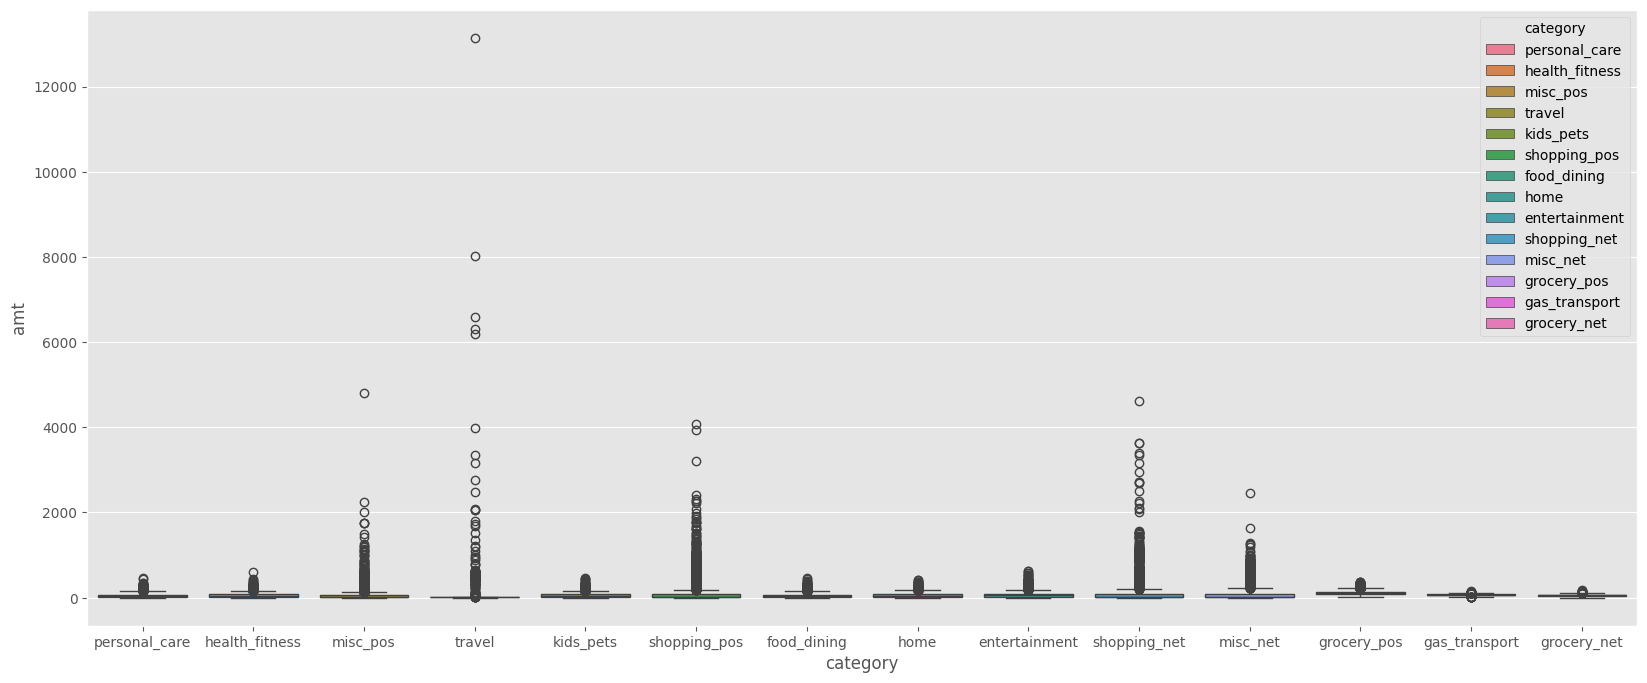

In [ ]:
plt.figure(figsize=(20, 8))
sns.boxplot(data = data, x = 'category', y = 'amt', hue = 'category')

<ipython-input-5-cceb45c14bf1>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['dob'] = pd.to_datetime(data['dob'])
<ipython-input-5-cceb45c14bf1>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])


<Axes: xlabel='age', ylabel='Count'>

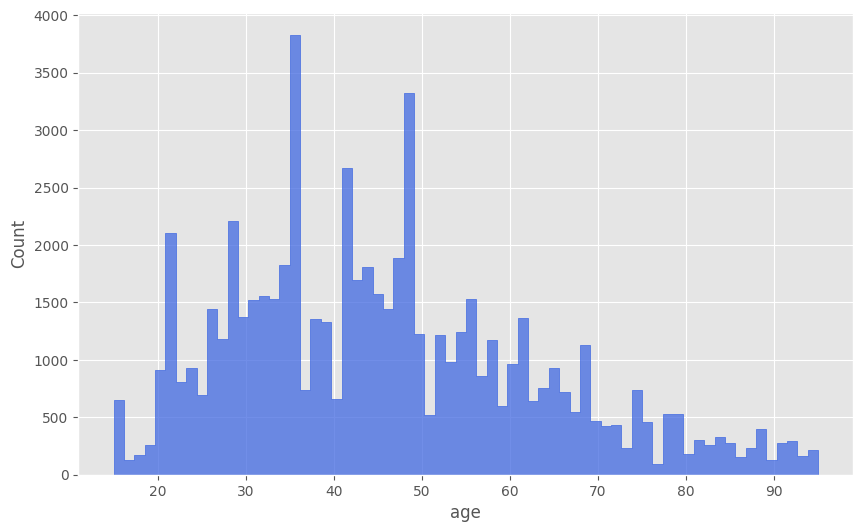

In [ ]:
data['dob'] = pd.to_datetime(data['dob'])
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['age'] = (data['trans_date_trans_time'] - data['dob']).dt.days // 365
sns.histplot(data = data, x = 'age',element='step', color = 'royalblue')

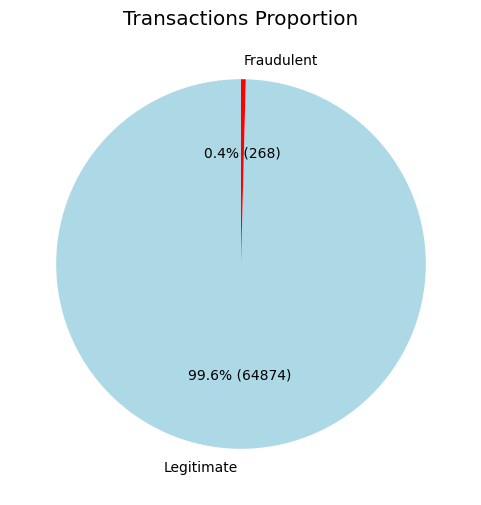

In [ ]:

fraud = data['is_fraud'].value_counts()

labels = ['Legitimate', 'Fraudulent']

colors = ['lightblue', 'red']

plt.figure(figsize=(6, 6))
plt.pie(
    fraud,
    labels=labels,
    autopct=lambda p: f'{p:.1f}% ({int(p * sum(fraud) / 100)})',  # Custom autopct
    startangle=90,
    colors=colors
)

plt.title('Transactions Proportion')
plt.show()

In [ ]:
round(data['age'].describe(), 1)

,age
count,65143.0
mean,46.0
std,17.4
min,15.0
25%,33.0
50%,44.0
75%,57.0
max,95.0


In [ ]:
round(data['amt'].describe(), 1)

,amt
count,65143.0
mean,69.3
std,144.5
min,1.0
25%,9.7
50%,47.2
75%,82.9
max,13149.2


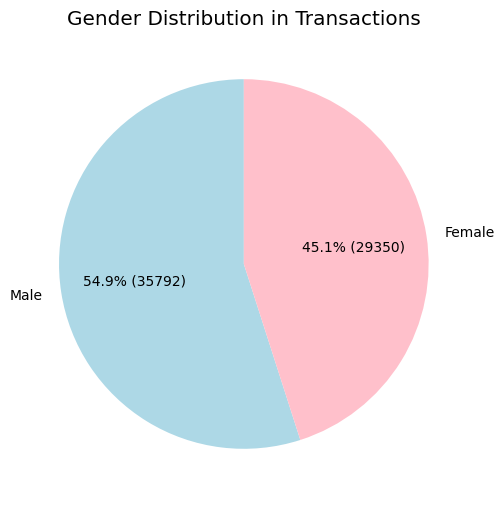

In [ ]:
gen = data['gender'].value_counts()

labels = ['Male', 'Female']

colors = ['lightblue', 'pink']

plt.figure(figsize=(6, 6))
plt.pie(
    gen,
    labels=labels,
    autopct=lambda p: f'{p:.1f}% ({int(p * sum(gen) / 100)})',
    startangle=90,
    colors=colors
)

plt.title('Gender Distribution in Transactions')
plt.show()

Jasmine

Severus

In [ ]:
# first we extract all the data that correspond to fraud transaction
data_fraud=data.loc[(data['is_fraud']==1)]
data_fraud.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1685,1685,21/06/2020 22:06,3.560730e+15,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,15/09/1969,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.604290,1
1767,1767,21/06/2020 22:32,6.564460e+15,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,10/09/1958,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461127,-91.147148,1
1781,1781,21/06/2020 22:37,6.564460e+15,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,42.5545,-90.3508,1306,Public relations officer,10/09/1958,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771834,-90.158365,1
1784,1784,21/06/2020 22:38,4.005680e+15,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,31/05/1994,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204974,-90.261595,1
1857,1857,21/06/2020 23:02,3.560730e+15,fraud_Hermann and Sons,shopping_pos,842.65,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,15/09/1969,f6838c01f5d2262006e6b71d33ba7c6d,1371855736,31.315782,-102.736390,1


In [ ]:
# below code for time series
# create a new df and put transaction time to be index
#s ummarize all fraud transactions on a monthly basis.
data_new=pd.read_csv('fraud test.csv',parse_dates=['trans_date_trans_time'], index_col='trans_date_trans_time')
data_new   #transaction time to be index

NameError: name 'data' is not defined

In [ ]:
# then base on the new df we extract all fraud transaction again:
data_new_fraud=data_new.loc[(data_new['is_fraud']==1)]
data_new_fraud.head()

In [ ]:
#the rest part of data visulazation and frequency table i will put bottom

In [ ]:
# for regression part, we need to create a new column called 'Weekend' to figure out each transaction is in weekday or in weekend
# first we need to know the day of week for each transaction, and we need to clean the format for transaction time first.
data['trans_date_trans_time']=pd.to_datetime(data['trans_date_trans_time'], format='%d/%m/%Y %H:%M') # clean the format
data['day_of_week'] = data['trans_date_trans_time'].dt.day_name()   #create a new column
data.head()

NameError: name 'data_new' is not defined

In [ ]:
# next create the column which called Weekend
data['Weekend']=['Weekend' if x=='Sunday' or x=='Saturday' else 'Weekday' for x in data['day_of_week']]
data.head()

Snowy

In [ ]:
# first we

In [ ]:
def categorize_job(job_title):
    # Define job categories
    categories = {
        "Healthcare": [
            "Paramedic", "Surgeon", "Nurse",
            "Therapist","Podiatrist","Audiological scientist",
            "Immunologist","Scientist, audiological","Psychologist, forensic","Counsellor",
            "Counselling psychologist","Medical sales representative",
            "Cytogeneticist",'Educational psychologist','Occupational psychologist','Psychologist, counselling',
            "Hospital doctor",'Physicist, medical','Forensic psychologist','Health physicist','Doctor, hospital',
            'Herbalist','Doctor, general practice','General practice doctor','Medical secretary','Chiropodist',
            'Exercise physiologist','Paramedic', 'Clinical Biochemist', 'Pharmacist (Community, Hospital)', 'Psychologist (Clinical, Sport)',
            'Psychiatrist', 'Oncologist', 'Diagnostic Radiographer', 'Optometrist', 'Physiological Scientist', 'Medical Technical Officer',
            'Embryologist', 'Acupuncturist','Dispensing optician','Biomedical scientist','Health service manager','Health and safety adviser',
            'Health visitor','Osteopath','Pharmacist (community, hospital)','Clinical psychologist','Medical physicist','Psychologist (sport and exercise, clinical)',
            'Pathologist','Physiological scientist','Community pharmacist','Hospital pharmacist','Orthoptist'
        ],
        "Education": [
            "Teacher", "Lecturer", "Professor",
            "Instructor", "Trainer", "Arts worker","Scientist, research (maths)","Geneticist, molecular",
            "Geoscientist","Scientist, marine","Research scientist (physical sciences)","Toxicologist",
            "Scientist, biomedical",'Education Officer (Community, Museum)', 'Teacher', 'Clinical Research Associate',
            "Academic Librarian", 'Museum Education Officer', 'Research Scientist (Life Sciences, Physical Sciences, Medical)',
            'Higher Education Careers Advise','Librarian (academic, public)','Education officer (museum, community)',
            'Careers information officer','Community education officer','Teaching laboratory technician','Education administrator',
            'Higher education careers adviser','Learning mentor'
        ],
        "Engineering & Tech": ["Engineer", "Energy manager", "Developer",'Naval architect','Operations Geologist',
                        'Hydrogeologist', 'Geochemist', 'Engineer', 'Technical Brewer', 'Seismic Interpreter',
                        'IT Consultant', 'Programmer (Applications)', 'Database Administrator', 'Telecommunications Researcher',
                        'Information Systems Manager','Camera operator','Metallurgist','Production manager','Operations geologist',
                        'Soil scientist','Hydrologist','Geologist (wellsite)','Mudlogger','Field seismologist','Programmer (applications)',
                        'Ecologist','Architectural technologist'
                              ],
        "Arts and Design": ["Artist", "Designer", "Ceramics", "Pottery",'Fine Artist', 'Illustrator', 'Animator', 'Theatre Manager', 'Art Gallery Manager', 'Stage Manager', 'Ceramics Designer',
                            'Museum Exhibitions Officer','Furniture conservator/restorer','Conservator (museum/gallery, furniture)','Theatre director',
                            'Arts development officer','Stage manager','Writer','Animator','Illustrator','Exhibitions officer, museum/gallery'],
        "Finance": ["Analyst", "Broker", "Accountant","Financial adviser","Comptroller","Financial trader",
                   "Accounting technician","Senior tax professional/tax inspector",'Tax inspector',
                   'Tax adviser','Investment Banker (Corporate, Operational)', 'Retail Banker', 'Accountant',
                   'Futures Trader', 'Pension Scheme Manager','Investment banker (corporate, operational)',
                    'Corporate investment banker','Equities trader','Operational investment banker','Economist','Purchasing manager',
                    'Buyer (industrial, retail)','Loss adjuster (chartered)'],
        "Construction": ["Surveyor", "Builder", "Facilities manager","Historic buildings inspector/conservation officer",
                        'Quantity Surveyor', 'Town Planner', 'Land Agent', 'Licensed Conveyancer', 'Estate Manager',
                         'Architect','Landscape architect','Conservation officer (historic buildings)','Quarry manager','Cartographer',
                        'Town planner'],
        "Media": [
            "Producer", "Journalist", "Radio producer",
            'Film/video editor',"Copywriter, advertising",
            "Magazine features editor","Production assistant, television",
            "Press photographer","Television production assistant","Musician",
            'Radio broadcast assistant','Multimedia programmer','Radiographer, therapeutic','Video editor','Programmer, multimedia',
            'Lexicographer','Programme researcher, broadcasting/film/video','Programmer, multimedia','Radiographer, diagnostic',
            'Broadcast Presenter', 'Radio Producer','Magazine Features Editor', 'Film/Video Editor',
            'Advertising Account Planner', 'Copywriter', 'Media Buyer', 'Public Relations Officer','Editor (commissioning, magazine features, film/video)',
            'Broadcast presenter','Presenter (broadcasting)','Television floor manager','Media planner','Advertising account executive','Advertising account planner',
            'Visual merchandiser','Marketing executive'

        ],
        "Consulting":["Environmental consultant","Agricultural consultant","Pensions consultant","Public relations account executive",
                     'Management consultant','Public affairs consultant','IT consultant'],
        "Legal":["Barrister","Trade mark attorney","Prison officer","Trading standards officer",'Patent attorney',
                'Chartered legal executive (England and Wales)','Solicitor (Scotland)','Lawyer', 'Company secretary'],
        "Retail":["Clothing/textile technologist","Merchandiser, retail",'Retail merchandiser',
                 'Retail manager','Retail buyer','Sales executive','Bookseller'],
        "Goverment":["Librarian, public","Local government officer","Firefighter",'Race relations officer',
                    'Archaeologist','Police officer','Administrator, local government','Social researcher','Probation officer',
                    'Curator','Research officer, political party',
                    'Civil Service Administrator', 'Armed Forces Training Officer','Social Research Officer (Government)',
                     'Emergency Planning Officer', 'Immigration Officer','Charity Officer', 'Volunteer Coordinator',
                     'Community Development Worker','Civil Service fast streamer','Social research officer (government)',
                     'Emergency planning/management officer', 'Immigration officer', 'Armed forces training and education officer',
                    'Armed forces logistics/support/administrative officer'
                    ],
        "Insurance":["Chartered loss adjuster","Claims inspector/assessor",'Insurance underwriter','Insurance claims handler'],
        "Management":['Chief Executive Officer','Chief Strategy Officer','Chief Operating Officer','Chief Financial Officer',
        'Chief Technology Officer','Chief Marketing Officer','Chief of Staff','Fitness centre manager','Leisure centre manager',
                      'Call centre manager','Theme park manager','Hotel manager','Restaurant manager (fast food)','Catering manager'],
        "Others": []
    }

    # Check job title against categories
    for category, keywords in categories.items():
        if any(keyword.lower() in job_title.lower() for keyword in keywords):
            return category
    return "Others"  # Default category for uncategorized jobs

# Apply the categorization to the dataset
data['job_category'] = data['job'].apply(categorize_job)

# Display a sample of the dataset with the new 'job_category' column
data.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,job_category
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,Engineering & Tech
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,Others
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,Goverment
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,Arts and Design
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,Arts and Design


Shreya

In [ ]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime  # to access datetime
import scipy.stats as stats

import plotly.express as px # for interactive plotting
import plotly.graph_objects as go # for interactive plotting

# set the graphics style initially to defaul
plt.style.use('default')

In [ ]:
# DATA CLEANING- added transaction date, month and age
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'], format='%d/%m/%Y %H:%M')
data['transaction_date'] = data['trans_date_trans_time'].dt.date
data['transaction_date'] = pd.to_datetime(data['transaction_date'])
data['dob'] = pd.to_datetime(data['dob'], errors='coerce')
data['age_at_transaction'] = (data['transaction_date'] - data['dob']).dt.days // 365
data['transaction_month'] = data['trans_date_trans_time'].dt.month

In [ ]:
# DATA ANALYSIS and VISUALISATION:

# calculating average transaction amount for each transaction month across fraud and non-fraud transaction
avg_amount = data.groupby(['transaction_month','is_fraud']).amt.mean()
avg_amount=pd.DataFrame(avg_amount)

# created a function to define different groups:
def categorize_age(age):
    if age < 18:
        return '0-18'
    elif 18 <= age < 25:
        return '18-25'
    elif 26 <= age < 35:
        return '26-35'
    elif 36 <= age < 45:
        return '36-45'
    elif 46 <= age < 55:
        return '46-55'
    elif 56 <= age < 65:
        return '46-55'
    else:
        return '65+'

data['age_group'] = data['age_at_transaction'].apply(categorize_age)

# making lineplot for avgamount:
mycolors = {0: 'pink', 1: 'skyblue'}
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=avg_amount,
    x='transaction_month',
    y='amt',
    hue='is_fraud',
    marker='o',
    palette=mycolors
)
plt.title('Average Transaction Amount: Fraud vs. Non-Fraud Across Months', fontsize=14)
plt.xlabel('Transaction Month', fontsize=12)
plt.ylabel('Average Amount ($)', fontsize=12)
plt.legend(title='Is Fraud', loc='upper right')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# visualization of transactions done by different age group across both transaction types
age_pattern = data.groupby(['age_group','is_fraud']).trans_num.count().unstack()
avg_amount=pd.DataFrame(avg_amount)

fig, ax=plt.subplots(2,1)
ax[0].bar(age_pattern.index,age_pattern[0], color='pink')
ax[1].bar(age_pattern.index,age_pattern[1], color='skyblue')
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')
ax[1].set_xlabel("Age-Group")
ax[0].set_title('Non-Fraud Transactions by Age Group', fontsize=14)
ax[1].set_title('Fraud Transactions by Age Group', fontsize=14)

plt.tight_layout()
plt.figure(figsize=(10,6))

plt.show()

Catherine

In [ ]:
#Create variable "distance"
from geopy.distance import geodesic

def calculate_distance(row):
    coords_1 = (row['lat'], row['long'])
    coords_2 = (row['merch_lat'], row['merch_long'])
    return geodesic(coords_1, coords_2).km

data['distance'] = data.apply(calculate_distance, axis=1)

print(data[['lat', 'long', 'merch_lat', 'merch_long', 'distance']].head())


In [ ]:
# Add new variables "hour", "day_of_week", "is_weekend", "month", "day", and "age" (user's age).
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'], format='%d/%m/%Y %H:%M')

data['hour'] = data['trans_date_trans_time'].dt.hour
data['day_of_week'] = data['trans_date_trans_time'].dt.dayofweek
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # Weekend indicator (1 for Saturday/Sunday)
data['month'] = data['trans_date_trans_time'].dt.month
data['day'] = data['trans_date_trans_time'].dt.day

data['dob'] = pd.to_datetime(data['dob'], format='%d/%m/%Y')
data['age'] = data['trans_date_trans_time'].dt.year - data['dob'].dt.year



In [ ]:
# Add variable "time_of_day"
def categorize_hour(hour):
    if 0 <= hour < 6:
        return 'midnight'
    elif 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'evening'

data['time_of_day'] = data['hour'].apply(categorize_hour)

In [ ]:
# Add variable "latenight"

def latenight_categorize(hour):
  if 22 <= hour <=23 or 0 <= hour <= 3:
    return 1
  else:
    return 0
data['latenight'] = data['hour'].apply(latenight_categorize)

# Data Overview Jerry analysis and visualizations

# EDA Jasmine analysis and visualizations

In [ ]:
# Filter for fraudulent transactions only (is_fraud == 1)
fraudulent_transactions = data[data['is_fraud'] == 1]

# Recalculate statistical values for fraudulent activity
fraud_by_category_stats = fraudulent_transactions['category'].value_counts()
fraud_by_state_stats = fraudulent_transactions['state'].value_counts()
fraud_by_time_stats = fraudulent_transactions['hour'].value_counts().sort_index()
fraudulent_amount_stats = fraudulent_transactions['amt'].describe()

# Combine statistics into a summary dictionary
fraudulent_stats_summary = {
    'Fraud by Category (Top 5)': fraud_by_category_stats.head(5).to_dict(),
    'Fraud by State (Top 5)': fraud_by_state_stats.head(5).to_dict(),
    'Fraud by Hour (Peak Hour)': fraud_by_time_stats.idxmax(),
    'Fraud Transaction Amount Stats': {
        'Average': fraudulent_amount_stats['mean'],
        'Range (25% - 75%)': (fraudulent_amount_stats['25%'], fraudulent_amount_stats['75%']),
        'Maximum': fraudulent_amount_stats['max'],
        'Minimum': fraudulent_amount_stats['min'],
    }
}

fraudulent_stats_summary


{'Fraud by Category (Top 5)': {'shopping_net': 506,
  'grocery_pos': 485,
  'misc_net': 267,
  'shopping_pos': 213,
  'gas_transport': 154},
 'Fraud by State (Top 5)': {'NY': 175,
  'PA': 114,
  'TX': 113,
  'CA': 76,
  'IL': 76},
 'Fraud by Hour (Peak Hour)': 22,
 'Fraud Transaction Amount Stats': {'Average': 528.3564941724942,
  'Range (25% - 75%)': (214.51, 907.77),
  'Maximum': 1320.92,
  'Minimum': 1.78}}

In [ ]:

# Recalculate statistics for fraudulent transactions by hour of the day (is_fraud == 1)
fraud_by_hour_stats = fraudulent_transactions.groupby('hour')['amt'].describe()

# Display the statistics
fraud_by_hour_stats


,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,188.0,346.499574,313.245183,6.12,18.0500,302.205,363.8000,1115.75
1,169.0,388.277988,309.969728,5.60,274.3600,315.830,599.0100,1116.06
2,168.0,376.833690,322.654577,5.62,123.5775,317.580,365.1825,1319.97
3,194.0,375.073144,309.952746,5.53,166.2375,312.060,520.5600,1155.37
4,15.0,275.750667,250.735520,8.13,73.0100,290.910,313.2100,967.86
5,20.0,305.586000,219.876005,7.86,228.9525,309.040,373.7725,798.67
6,14.0,344.603571,355.079424,8.88,18.9975,288.560,479.0975,1071.19
7,16.0,392.026875,344.501776,8.65,86.2525,316.150,690.2225,1054.16
8,10.0,328.035000,211.411372,8.44,279.2500,299.030,315.9325,866.79


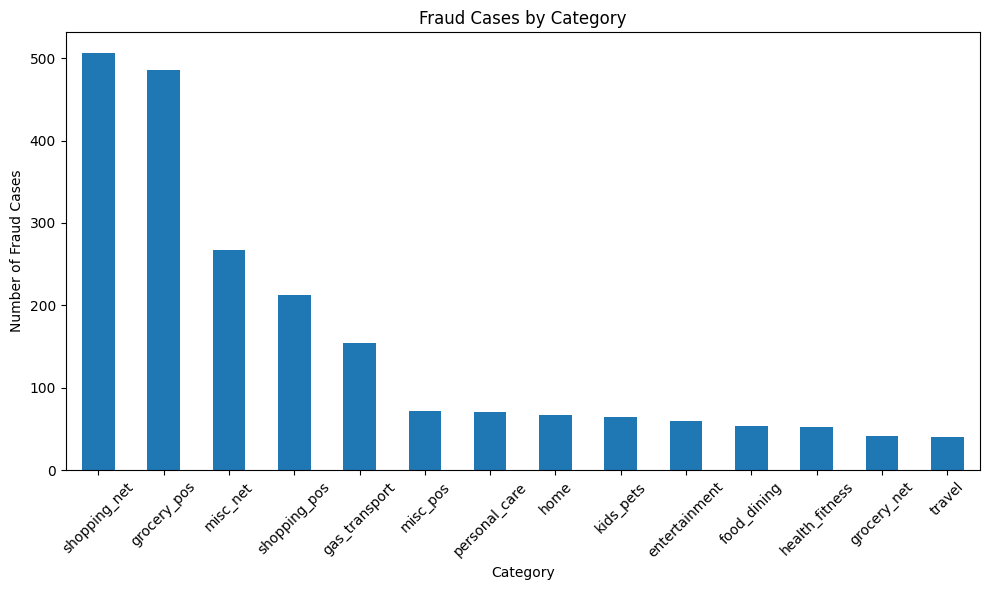

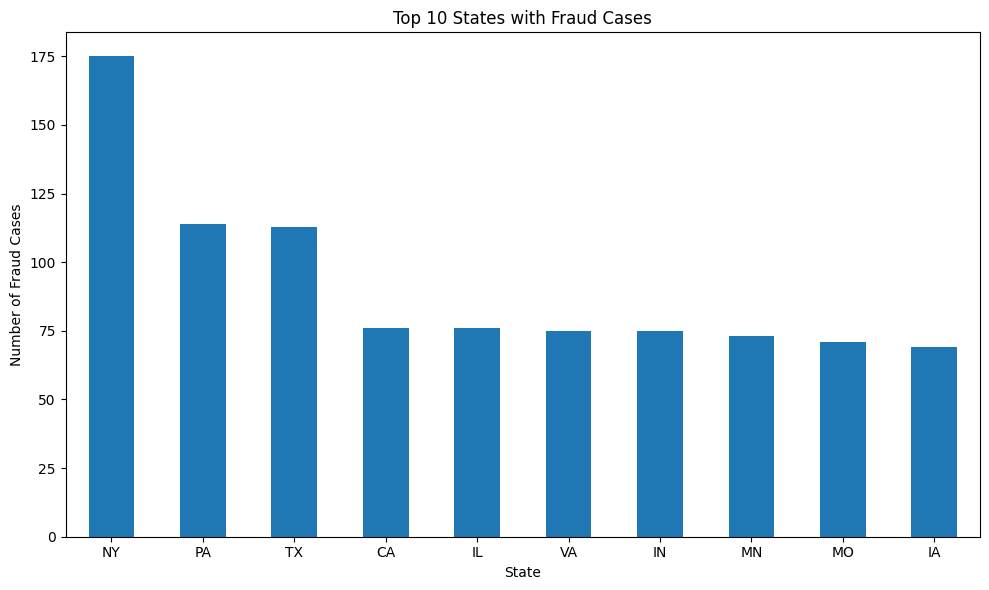

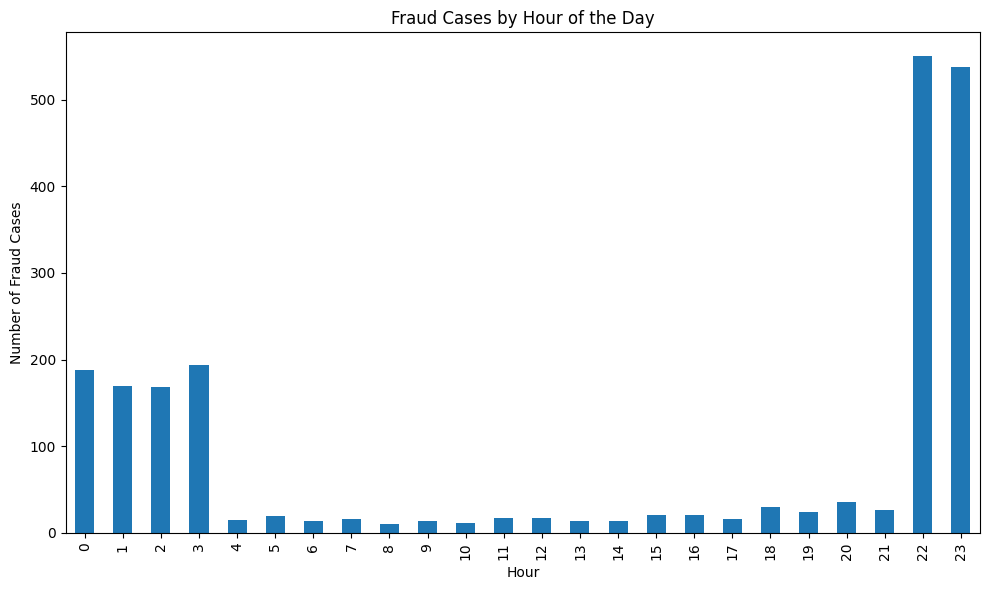

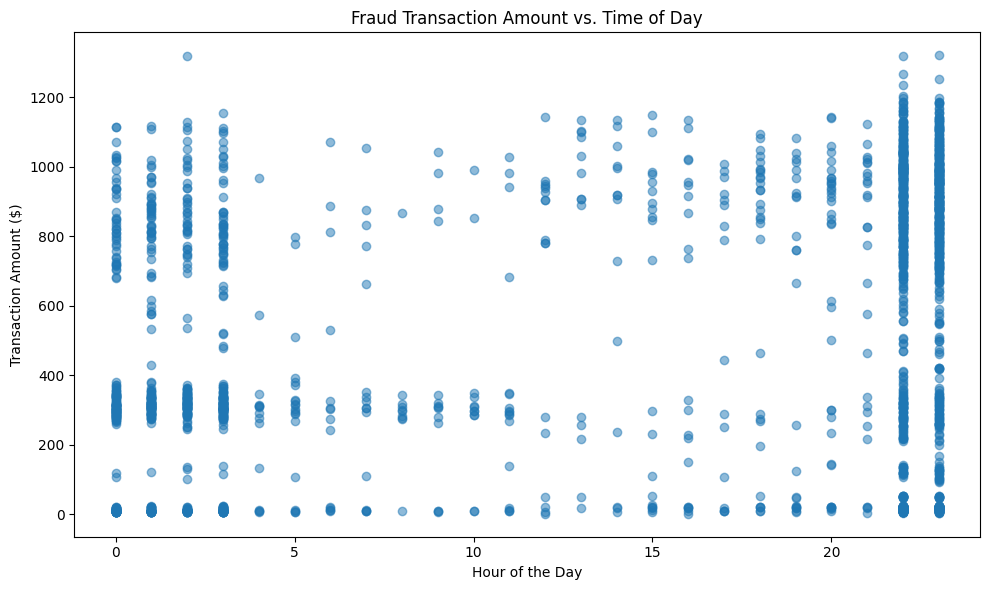

In [ ]:
# Fraud by Category (Filtered for is_fraud == 1)
plt.figure(figsize=(10, 6))
fraudulent_transactions['category'].value_counts().plot(kind='bar')
plt.title('Fraud Cases by Category')
plt.xlabel('Category')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Fraud by State (Filtered for is_fraud == 1)
plt.figure(figsize=(10, 6))
fraudulent_transactions['state'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 States with Fraud Cases')
plt.xlabel('State')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Fraud by Time of Day (Filtered for is_fraud == 1)
plt.figure(figsize=(10, 6))
fraudulent_transactions['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Fraud Cases by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Fraud Cases')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Scatter Plot: Fraud Amount vs Time of Day (Filtered for is_fraud == 1)
plt.figure(figsize=(10, 6))
plt.scatter(fraudulent_transactions['hour'], fraudulent_transactions['amt'], alpha=0.5)
plt.title('Fraud Transaction Amount vs. Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Amount ($)')
plt.tight_layout()
plt.show()


          amt age_group income_bracket
1685    24.84     46-55            Low
1767   780.52     56-65            Low
1781   620.33     56-65            Low
1784  1077.69     26-35           High
1857   842.65     46-55            Low


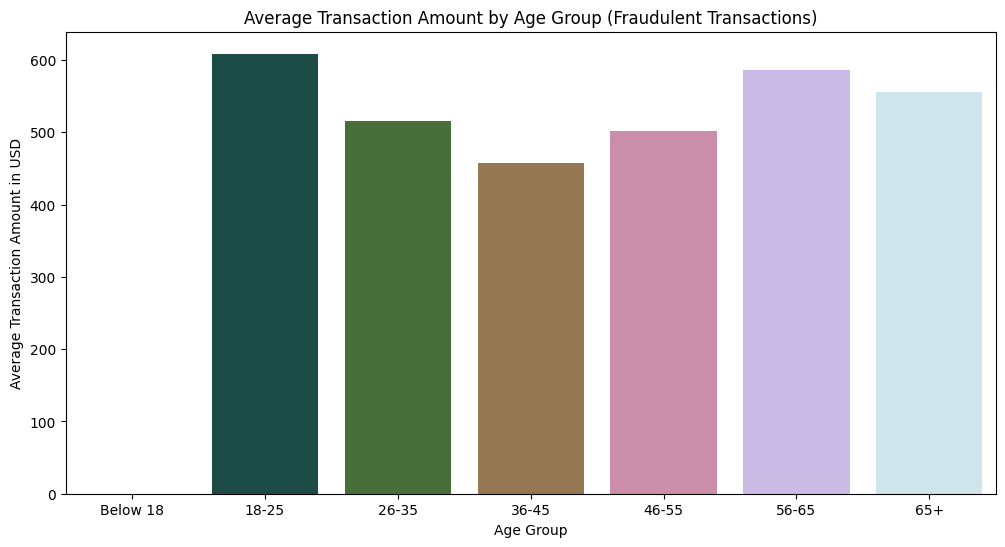

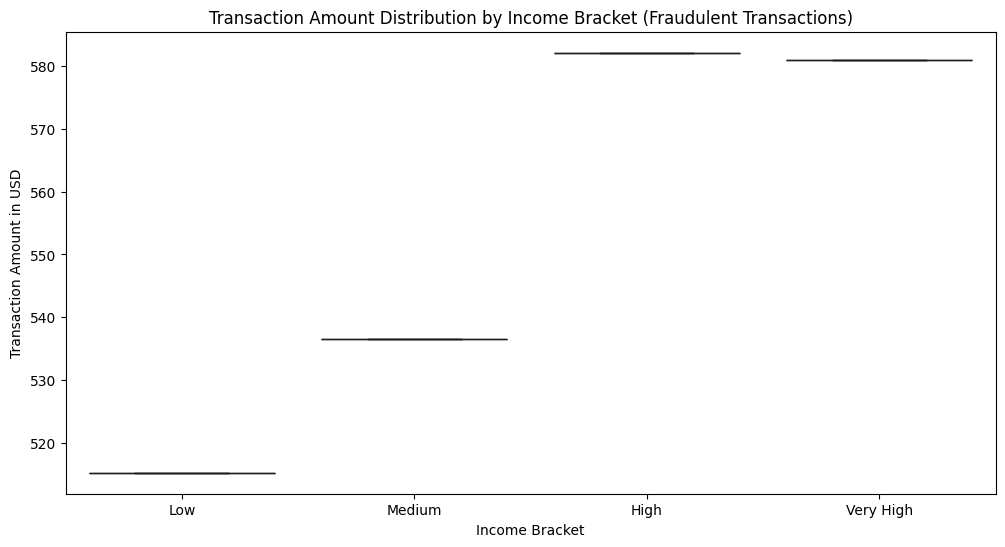

(                 mean  median        sum  count
 age_group                                      
 Below 18          NaN     NaN       0.00      0
 18-25      608.721242  772.55   93134.35    153
 26-35      515.553701  367.36  210345.91    408
 36-45      457.945104  336.24  176766.81    386
 46-55      501.299307  341.31  217062.60    433
 56-65      586.067714  715.92  205123.70    350
 65+        556.364602  364.21  230891.31    415,
                       mean  median        sum  count
 income_bracket                                      
 Low             515.286658  355.11  800240.18   1553
 Medium          536.591532  487.38  133074.70    248
 High            582.078235  697.97   79162.64    136
 Very High       580.995962  724.72  120847.16    208)

In [ ]:
#create date of birth portion

data['dob'] = pd.to_datetime(data['dob'], format='%d/%m/%Y', errors='coerce')
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'], errors='coerce')

data['age'] = data['trans_date_trans_time'].dt.year - data['dob'].dt.year

# Define age groups (including "Below 18")
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['Below 18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)

# Define income brackets based on 'city_pop'
income_bins = [0, 10000, 50000, 100000, data['city_pop'].max()]
income_labels = ['Low', 'Medium', 'High', 'Very High']
data['income_bracket'] = pd.cut(data['city_pop'], bins=income_bins, labels=income_labels, right=False)

# Filter for fraudulent transactions only
fraudulent_data = fraud[fraud['is_fraud'] == 1]

# Display the first few rows of the preprocessed fraudulent data
print(fraudulent_data[['amt', 'age_group', 'income_bracket']].head())

# Aggregate spending data by age group and income bracket
age_group_stats = fraudulent_data.groupby('age_group')['amt'].agg(['mean', 'median', 'sum', 'count'])
income_bracket_stats = fraudulent_data.groupby('income_bracket')['amt'].agg(['mean', 'median', 'sum', 'count'])


# bar chart Spending patterns across age groups
plt.figure(figsize=(12, 6))
sns.barplot(data=age_group_stats.reset_index(), x='age_group', y='mean', palette='cubehelix')
plt.title('Average Transaction Amount by Age Group (Fraudulent Transactions)')
plt.ylabel('Average Transaction Amount in USD')
plt.xlabel('Age Group')
plt.show()

# boxplot Spending patterns across income brackets
plt.figure(figsize=(12, 6))
sns.boxplot(data=income_bracket_stats.reset_index(), x='income_bracket', y='mean', palette='cubehelix')
plt.title('Transaction Amount Distribution by Income Bracket (Fraudulent Transactions)')
plt.ylabel('Transaction Amount in USD')
plt.xlabel('Income Bracket')
plt.show()
# Display aggregate statistics
age_group_stats, income_bracket_stats


# EDA Severus visualizations

In [ ]:
# summarize all fraud transactions on a monthly basis.
month_fraud=data_new_fraud[['amt']].resample('M').sum()
month_fraud

<ipython-input-19-826339b1658d>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_fraud=data_fraud[['amt']].resample('M').sum()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [ ]:
# get the visulation about fraud transaction for time series:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=month_fraud.index,
    y=month_fraud['amt'],
    mode='lines',
    name='Fraud Amount'))

fig.update_layout(title_text='Fraud Amount by each Month',
    yaxis_title='Transaction AMT',
                  width=1000,
                  height=500,
                 xaxis=dict(rangeslider=dict(visible=True)),
                  xaxis_showgrid=False,yaxis_showgrid=False)
fig.show()

NameError: name 'go' is not defined

In [ ]:
# we can also get a frequency table for fraud transaction correspond to each date:
data_fraud.trans_date_trans_time.value_counts()

In [ ]:
# second we will get a frequency table for fraud transaction correspoond to each category:
data_fraud.category.value_counts()

In [ ]:
# data visulation for category:
plt.figure(figsize=(12, 6))
sns.histplot(data=data_fraud, x="category", hue="category",element='step')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# third we will get a frequency table for fraud transaction correspond to each state:
data_fraud.state.value_counts()
# we can more accurately pinpoint more specific locations
data_fraud.city.value_counts()
data_fraud.street.value_counts()


In [ ]:
# visulization for location:
plt.figure(figsize=(15, 6))
sns.histplot(data=data_fraud, x="state", hue="state",element='step',legend=False)
plt.show()


In [ ]:
# Top 20 cities for fraud transaction:
city_20=data_fraud.city.value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=city_20.index, y=city_20.values)
plt.xticks(rotation=45)
plt.show()


In [ ]:
# use chi-square to test whether there is a relation between the transation (is fraud or not) and the day of week( happend in the weekend or weekday)
WTF=pd.crosstab(data.is_fraud,data.Weekend)   #create a crosstable first
WTF

In [ ]:
chi2, p, dof, expected = stats.chi2_contingency(WTF.fillna(0))
print(f"Chi-square Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

In [ ]:
# However we could also be more sepcific to see in each day of weeek
DTF=pd.crosstab(data.day_of_week,data.is_fraud)
DTF

In [ ]:
chi2, p, dof, expected = stats.chi2_contingency(DTF.fillna(0))
print(f"Chi-square Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

In [ ]:
# use t-test to test is there a relation between gender and fraud transaction amount
 data_fraud.groupby('gender').amt.sum()


In [ ]:
male=data_fraud[data_fraud['gender']=='M']['amt']
female=data_fraud[data_fraud['gender']=='F']['amt']
stats.ttest_ind(a=male, b=female,equal_var=True)

# Preparation for Regression

In [ ]:
# Create Binary variables with One-Hot Encoding

data = pd.get_dummies(credit, columns=['gender', 'category'], drop_first=True)


# Verify the updated DataFrame
data.head()


In [ ]:
# Convert all boolean columns in the DataFrame to integers
bool_columns = data.select_dtypes(include=['bool']).columns
data[bool_columns] = data[bool_columns].astype(int)


# Regression